# Introduction:
This Exploratory Data Analysis (EDA) study analyzes the IEEE-CIS Fraud Detection dataset, which was acquired from the Vesta Corporation-hosted Kaggle competition of the IEEE Computational Intelligence Society. This dataset's main goal is to make it easier to identify and anticipate fraudulent online transactions by thoroughly analyzing transaction and identity-related data. Numerous transaction details are included, such as transaction amounts, card information, email domains, and other characteristics meant to differentiate between authentic and fraudulent activity. Python is used for this investigation, making use of data processing and visualization tools like Pandas, NumPy, Matplotlib, and Seaborn. To facilitate future modeling and prediction efforts in fraud detection scenarios, this EDA seeks to thoroughly examine the data, spot significant patterns, spot anomalies, and provide clear insights.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display  # For table display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import csv

In [2]:
# Define file paths
train_transaction_path = r"C:\Users\Dell\Desktop\HarinathReddy\ieee-fraud-detection\train_transaction.csv"
train_identity_path = r"C:\Users\Dell\Desktop\HarinathReddy\ieee-fraud-detection\train_identity.csv"
test_transaction_path = r"C:\Users\Dell\Desktop\HarinathReddy\ieee-fraud-detection\test_transaction.csv"
test_identity_path = r"C:\Users\Dell\Desktop\HarinathReddy\ieee-fraud-detection\test_identity.csv"

# Load Data
train_transaction = pd.read_csv(train_transaction_path, encoding="utf-8", delimiter=",", low_memory=False)
train_identity = pd.read_csv(train_identity_path, encoding="utf-8", delimiter=",", low_memory=False)
test_transaction = pd.read_csv(test_transaction_path, encoding="utf-8", delimiter=",", low_memory=False)
test_identity = pd.read_csv(test_identity_path, encoding="utf-8", delimiter=",", low_memory=False)

# Display first 5 rows of each dataset with headings
print("Train Transaction Data:")
display(train_transaction.head())

print("\nTrain Identity Data:")
display(train_identity.head())

print("\nTest Transaction Data:")
display(test_transaction.head())

print("\nTest Identity Data:")
display(test_identity.head())


Train Transaction Data:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Train Identity Data:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS



Test Transaction Data:


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Test Identity Data:


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [3]:
# Merge transaction and identity data
train_df = train_transaction.merge(train_identity, on="TransactionID", how="left")
test_df = test_transaction.merge(test_identity, on="TransactionID", how="left")

In [4]:
# Descriptive Analysis ( Train Summary statistics)
print("Train Summary Statistics of Numerical Features:")
train_summary = train_df.describe()
display(train_summary)

Train Summary Statistics of Numerical Features:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [5]:
# Descriptive Analysis ( Test Summary statistics)
print("Test Summary Statistics of Numerical Features:")
test_summary = train_df.describe()
display(test_summary)

Test Summary Statistics of Numerical Features:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [6]:
# ------------------- Data Cleaning -------------------
# Handle missing values correctly for numeric columns
train_df.update(train_df.select_dtypes(include=[np.number]).apply(lambda x: x.fillna(x.median())))
test_df.update(test_df.select_dtypes(include=[np.number]).apply(lambda x: x.fillna(x.median())))

# Handle missing categorical values by filling with mode
train_df.update(train_df.select_dtypes(include=["object"]).apply(lambda x: x.fillna(x.mode()[0])))
test_df.update(test_df.select_dtypes(include=["object"]).apply(lambda x: x.fillna(x.mode()[0])))

In [7]:
# Remove duplicate records if any
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [8]:
# Detect and handle outliers using IQR method
Q1 = train_df['TransactionAmt'].quantile(0.25)
Q3 = train_df['TransactionAmt'].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[(train_df['TransactionAmt'] >= (Q1 - 1.5 * IQR)) & 
                      (train_df['TransactionAmt'] <= (Q3 + 1.5 * IQR))]

In [9]:
# ------------------- Data Preprocessing -------------------
# Scaling TransactionAmt
scaler = StandardScaler()
train_df.loc[:, 'TransactionAmt_Scaled'] = scaler.fit_transform(train_df[['TransactionAmt']])
test_df.loc[:, 'TransactionAmt_Scaled'] = scaler.transform(test_df[['TransactionAmt']])

In [10]:
# Encode categorical variables (e.g., card type)
if 'card4' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['card4'], drop_first=True)
    test_df = pd.get_dummies(test_df, columns=['card4'], drop_first=True)

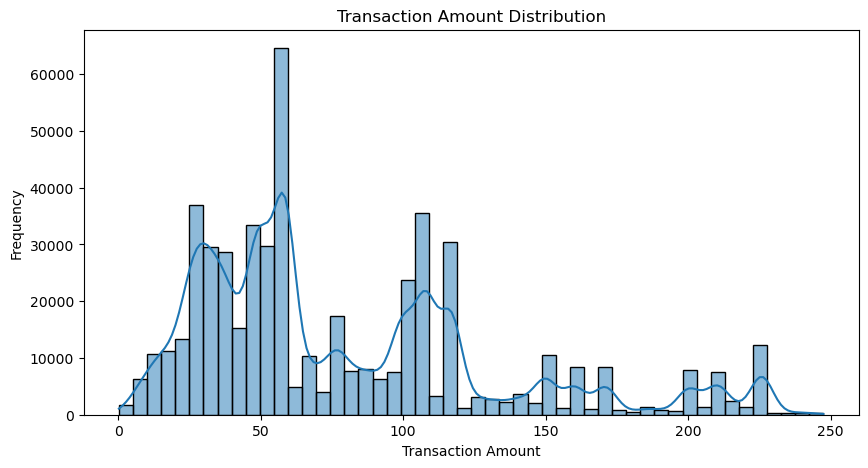

In [11]:
# ------------------- Data Analysis and Visualization -------------------
# Univariate Analysis: Histogram and density plots for TransactionAmt
plt.figure(figsize=(10, 5))
sns.histplot(train_df['TransactionAmt'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

Transaction Amount Distribution Analysis:

The transaction amount distribution is depicted by the KDE plot and histogram. Because of the distribution's right skew, more transactions take place at lower values, while fewer transactions have greater amounts. This implies that the majority of transactions are very little purchases, with sporadic high-value transactions.

Transaction amounts that happen more frequently are indicated by distinct peaks in the KDE curve and histogram. Around 50 transactions, there is the highest concentration, followed by other noteworthy peaks at 10, 20, 70, 100, and 150. These recurrent numbers imply typical transaction quantities, which may be a reflection of conventional corporate procedures, pricing schemes, or consumer purchasing trends. Higher transaction quantities are present, as indicated by the distribution's long tail, although they are far less common.

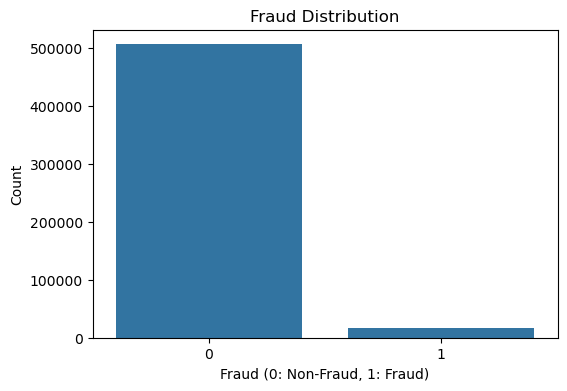

In [12]:
# Fraud distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=train_df)
plt.title("Fraud Distribution")
plt.xlabel("Fraud (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

Fraud Distribution Analysis:

The distribution of fraudulent (1) and non-fraudulent (0) transactions is shown visually in the bar plot. The much wider bar for category 0 indicates that most transactions are not fraudulent. The dataset exhibits a significant class imbalance, as seen by the significantly lower incidence of fraudulent transactions (category 1).

This contrast suggests that, in comparison to authentic transactions, fraudulent ones are uncommon. These class differences are prevalent in datasets used for fraud detection and might affect how well machine learning models perform, possibly producing biased predictions that favor the dominant class.

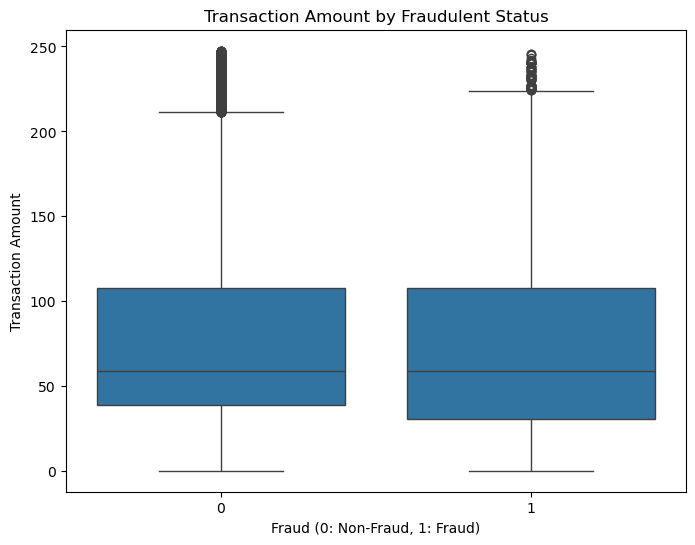

In [13]:
# Bivariate Analysis: Boxplot comparing fraud and non-fraud transactions by amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='TransactionAmt', data=train_df)
plt.title("Transaction Amount by Fraudulent Status")
plt.xlabel("Fraud (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

Transaction Amount by Fraudulent Status:

Transaction amount distributions for fraudulent (1) and non-fraudulent (0) transactions are contrasted in the boxplot. It indicates that the median transaction amount is comparable for both groups, suggesting that transaction value is not always a reliable indicator of fraud or non-fraud.

Both fraud and non-fraud transactions have comparable interquartile ranges (IQRs), which indicates that the majority of transactions fall within the same range. Both groups do, however, show anomalies, especially for high-value transactions over 200, which may indicate rare but valid big purchases or possible fraud efforts.

This graphic emphasizes the necessity of examining extra variables for efficient fraud detection by implying that illegal transactions are not always worth more or less than legitimate ones.

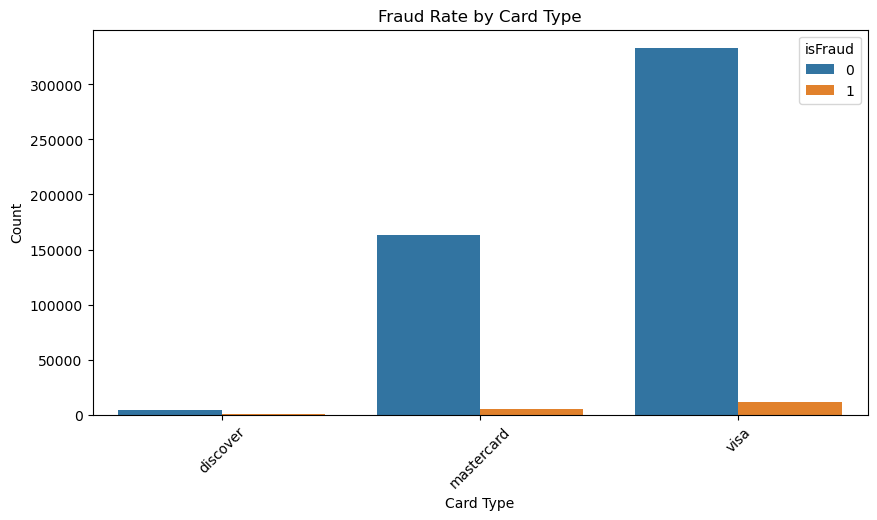

In [14]:
# Bivariate Analysis: Fraud rate by card type
card4_columns = [col for col in train_df.columns if col.startswith('card4_')]
if len(card4_columns) > 0:
    # Melt one-hot encoded card4 columns into a single categorical column
    train_df_melted = train_df.melt(id_vars=['isFraud'], value_vars=card4_columns, var_name='card4', value_name='value')
    train_df_filtered = train_df_melted[train_df_melted['value'] == 1].copy()
    train_df_filtered.loc[:, 'card4'] = train_df_filtered['card4'].str.replace('card4_', '', regex=True)

    # Create the countplot
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df_filtered, x='card4', hue='isFraud')
    plt.title("Fraud Rate by Card Type")
    plt.xlabel("Card Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Warning: No 'card4' related columns found in the dataset!")


Fraud Rate by Card Type:

The distribution of both fraudulent and non-fraudulent transactions for each type of card is shown graphically by the bar plot. Visa and Mastercard account for most of the dataset's transactions, whilst Discover accounts for a far smaller percentage.

The frequency of fraudulent transactions (orange) is significantly lower than that of non-fraudulent transactions (blue) for all card types. Different card types have different fraud percentages, though, with Visa and Mastercard having comparatively greater fraud rates than Discover. This implies that the amount of transactions, card usage trends, or security protocols put in place by various card issuers may all have an impact on fraud incidents.

When examining fraud trends, this picture emphasizes the need of taking card type into account because certain card networks may be more frequently targeted by fraudulent activity than others.

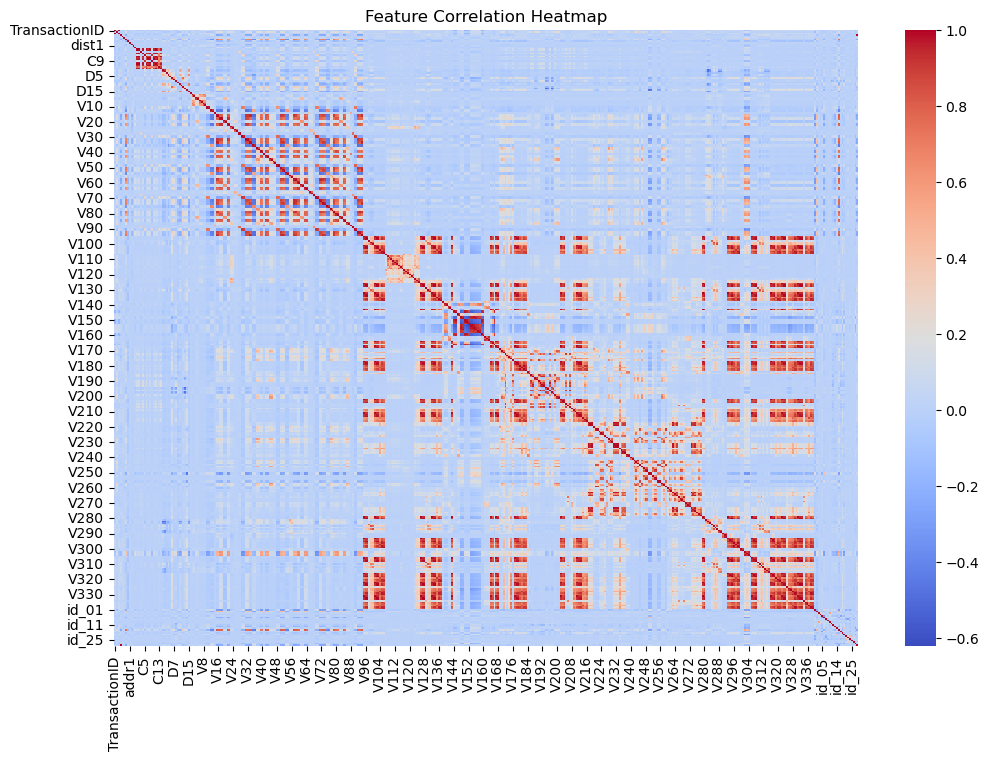

In [15]:
# Multivariate Analysis: Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation analysis
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numeric_cols].corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Feature Correlation Heatmap:

The correlation between the dataset's numerical properties is displayed visually in the heatmap. A strong positive connection is represented by red on the color scale, a strong negative correlation by blue, and a weak or nonexistent association by lighter hues.

The majority of characteristics show weak correlations (lighter red and blue hues), indicating that there are a lot of independent variables in the dataset.
Strong positive correlations (dark red) may be seen in certain clusters and along the diagonal, suggesting that some traits might be redundant or linked.
Additionally, some factors show negative correlations (darker blue), indicating an adverse association.
The existence of connected variable blocks raises the possibility of feature groups with associated underlying data patterns.

Note: TrasactionID consists of numerical data

In [16]:
# Save cleaned and processed data for further use
train_df.to_csv("fraud_trends_analysis_train.csv", index=False)
test_df.to_csv("fraud_trends_analysis_test.csv", index=False)
